In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
student_info = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentInfo.csv")
assessments = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/assessments.csv")
student_assessment = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentAssessment.csv")
courses = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/courses.csv")
student_registration = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentRegistration.csv")
student_vle = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentVle.csv")
vle = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/vle.csv")

#replicability

In [3]:
student_assessment.dropna(inplace=True)
student_info.dropna(inplace=True)
student_registration.dropna(inplace=True)
student_vle.dropna(inplace=True)

In [30]:
combined = [student_assessment, student_info, student_registration, student_vle]
combined = reduce(lambda left,right: pd.merge(left,right,on='id_student'), combined)
combined['final_result'].value_counts()

Withdrawn      16697024
Pass            6924889
Fail            2169591
Distinction     1149815
Name: final_result, dtype: int64

In [31]:
combined=combined.groupby('id_student')[['sum_click']].sum()

In [7]:
 = [student_info, combined]
table2 = reduce(lambda left,right: pd.merge(left,right,on='id_student'), table)
table2['final_result'].value_counts()

Withdrawn      5295
Pass            784
Fail            557
Distinction     119
Name: final_result, dtype: int64

In [8]:
table2['final']= np.where(table2['final_result']=='Withdrawn', 1, 0)

In [12]:
;


''

In [9]:
le = preprocessing.LabelEncoder()
df_final = table2.apply(le.fit_transform)

#one hot encoding

In [10]:
df_final.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,final
0,0,1,59,0,0,0,7,0,0,4,0,3,885,1
1,0,3,59,0,0,0,7,0,1,4,0,1,885,0
2,0,1,102,1,8,2,7,1,0,4,0,3,2236,1
3,0,3,102,1,8,2,7,1,1,4,0,2,2236,0
4,0,1,116,1,8,1,8,1,0,4,0,3,880,1


In [18]:
is3=df_final['code_presentation']==3

In [19]:
df_final3=df_final[is3]

In [20]:
df_final3=df_final3.drop(columns="code_module")

In [21]:
df_final3=df_final3.drop(columns="code_presentation")

In [22]:
df_final3=df_final3.drop(columns="id_student")

In [23]:
df_final3=df_final3.drop(columns="final_result")

In [24]:
df_final3nosum=df_final3.drop(columns="sum_click")

In [25]:
# Decision Tree for Table with sum_click

X = df_final3.loc[:, df_final3.columns != 'final']
y = df_final3['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.744 



In [26]:
# Decision Tree for Table with no sum_click

X = df_final3nosum.loc[:, df_final3nosum.columns != 'final']
y = df_final3nosum['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.717 



In [27]:
# Random Forest for Table with sum_click
X = df_final3.loc[:, df_final3.columns != 'final']
y = df_final3['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.789 



In [25]:
# Random Forest for Table without sum_click
X = df_final3nosum.loc[:, df_final3nosum.columns != 'final']
y = df_final3nosum['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.748 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


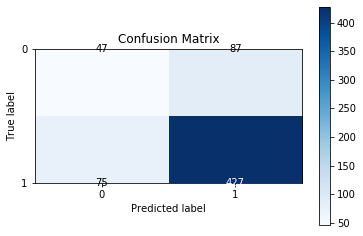

In [28]:
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=False)

plt.show()

In [ ]:
#switch the steps